<a href="https://colab.research.google.com/github/captain7oxic/Pytorch_practice/blob/main/Pytorch_practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [ ]:
#now we need to import the MNIST data of handwritten images. (28*28 px)


# New section

In [3]:
# The MNIST datasets are hosted on yann.lecun.com that has moved under CloudFlare protection
# Run this script to enable the datasets download
# Reference: https://github.com/pytorch/vision/issues/1938

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [4]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 419114217.32it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 127109857.11it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 142109304.17it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17255913.74it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



Here Batch size is the number of images that are going to be fed to NN for one iteration of training, and shuffle equals true so that the dataset is shuffled at each epoch or basically when the Trainloader is called or  is hit.

Dataloader & Dataset - pytorch primitive

Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

Transforms are common image transformations available in the torchvision.transforms module. They can be chained together using Compose.

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


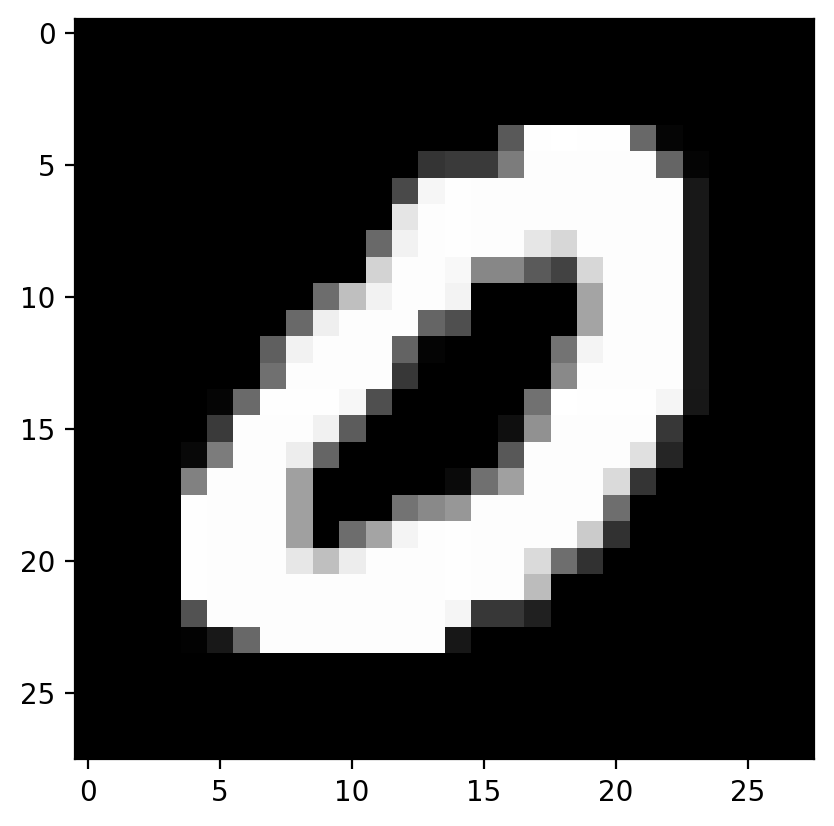

In [6]:
# now we will try to see some images in the dataset , its looks lame in 2023 to see images through code when your days are spent on Instagram, where just a swipe does it for you , but trust me it has a different feeling altogether.

dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)
# This is what one of the images looks like.

plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [12]:
images[1].numpy() # this is what the image looks in the database

array([[[-1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , 

Now we need to flatten the images tensor. Why  ?
Well all the input layers and hidden layers take the input in form of a one dimensional tensor , but our images tensor is a 28*28 2D tensor.
So we will flat it out to make a vector of [64,784].

In the same fashion our output will not be a single node but 10 node for all possible digits.

Flattening is a process in which we reduce the dimensionality of a vector/tensor.
ex -

[[2,3][4,5]] == [2,3,4,5]





In [13]:
#flatten the images

input = images.view(images.shape[0],-1)

#1st layer

W1 = torch.randn(784,256)
B1 = torch.randn(1,256) #implying 256 nodes in hidden layer

#2nd layer : output layer

W2 = torch.randn(256,10)
B2  =  torch.randn(10)

#activation
def activation(x):
    return 1/(1+torch.exp(-x))

h = activation(torch.mm(input,W1)+B1)
output  = activation(torch.mm(h,W2)+B2)


-1: This is a placeholder value used in the view() method to automatically infer the size of the second dimension based on the size of the tensor and the specified size of the first dimension. By using -1, you're telling PyTorch (assuming this code is using PyTorch) to compute the appropriate size of the second dimension based on the number of elements in the tensor.

 we need a softmax function at output layer to claculate the probabilities among 10 classes and choosing the maximum, Note this model is just a untrained model, and has all the probablities same, so let us create one.

In [15]:
def softmax(x):
  #dim =1 for calculating around the 2nd dimension,(-1) in the view to choose appropriate rows from previous step as the number is unspecified
  return torch.exp(x)/torch.sum(torch.exp(x),dim =1).view(-1,1)

In [16]:
probablities = softmax(output)

In [22]:
print(probablities.sum(dim=1))
#since all the probabilities sum up to 1 that is the key identifier that our softmax is working correctly.

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


Now let us use the easier method than this as pytorch provides this feature directly to create Neural Net layers suing the NN

In [23]:
from torch import nn

In [30]:
class Net(nn.Module):
  def __init__(self):
     super().__init__()

     self.hidden = nn.Linear(784,256)
     self.output = nn.Linear(256,10)

     self.sigmoid = nn.Sigmoid()
     self.softmax = nn.Softmax(dim=1)

  def forward(self,x):
    x=self.hidden(x)
    x=self.sigmoid(x)
    x= self.output(x)
    x=self.softmax(x)
    return(x)



In [31]:
model = Net()

In [32]:
model

Net(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)